<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Understand_band_data_info_using_histogram_and_classifying_pixel_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/
#Sentinel 2 Use Handbook. https://sentinels.copernicus.eu/documents/247904/685211/Sentinel-2_User_Handbook



In [311]:
!pip install rioxarray


In [312]:
!pip install geopandas

In [313]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd



In [314]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif'
#os.chdir(path)
#data_path = os.path.join("/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif")
data = rxr.open_rasterio(path)

In [315]:
data.shape

(1, 20, 20)

In [316]:
!pip install earthpy

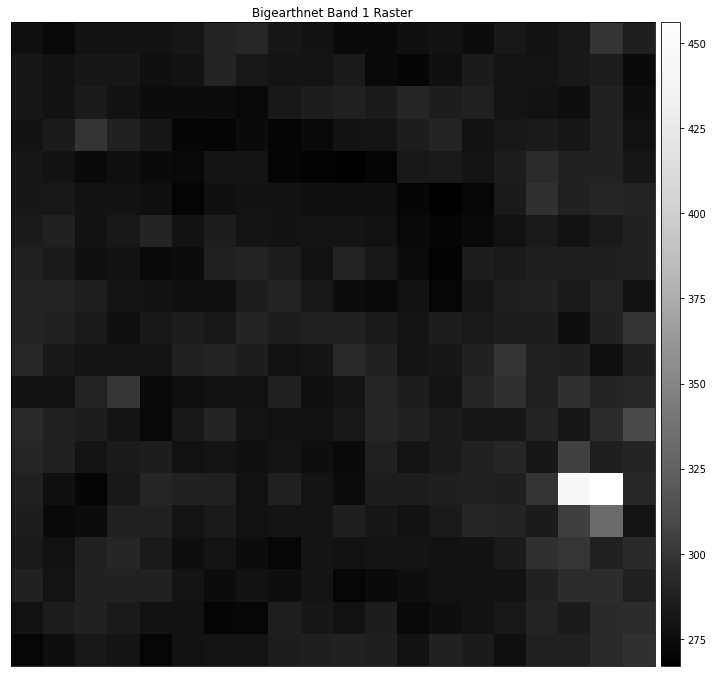

In [317]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
ep.plot_bands(data,
              title="Bigearthnet Band 1 Raster")
plt.show()

In [318]:
#https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_bands_functionality.html
#Stack all bands of BigEarthNet Data sample one band tiff images
import glob
files = glob.glob(os.path.join('/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B*.tif'))
files.sort()
print("Number of Bands",len(files))
#array_stack, meta_data = es.stack(path, nodata=-9999)


Number of Bands 12


# New Section

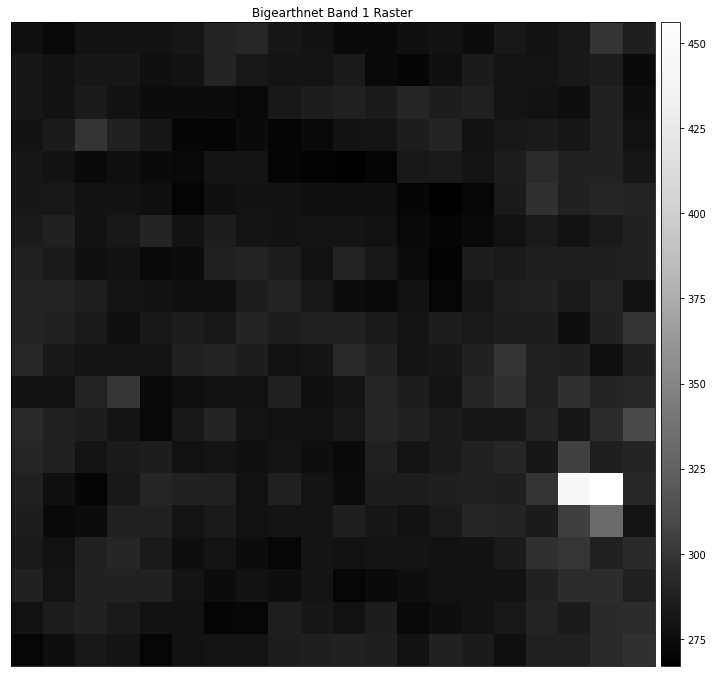

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(60.0, -60.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 20, 20)
min value: 267
max value: 456


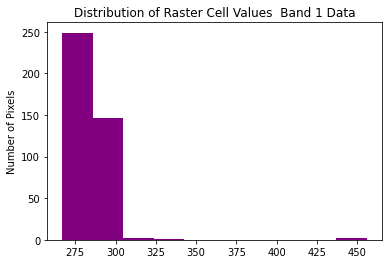

In [319]:
band1= rxr.open_rasterio(files[0])
ep.plot_bands(band1,
              title="Bigearthnet Band 1 Raster")
plt.show()
print("The CRS of this data is:", band1.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band1.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band1.rio.resolution())
print("The nodatavalue of your data is:", band1.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band1.rio.count)
print("The shape of your data is:", band1.shape)
print('min value:', np.nanmin(band1))
print('max value:', np.nanmax(band1))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 1 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

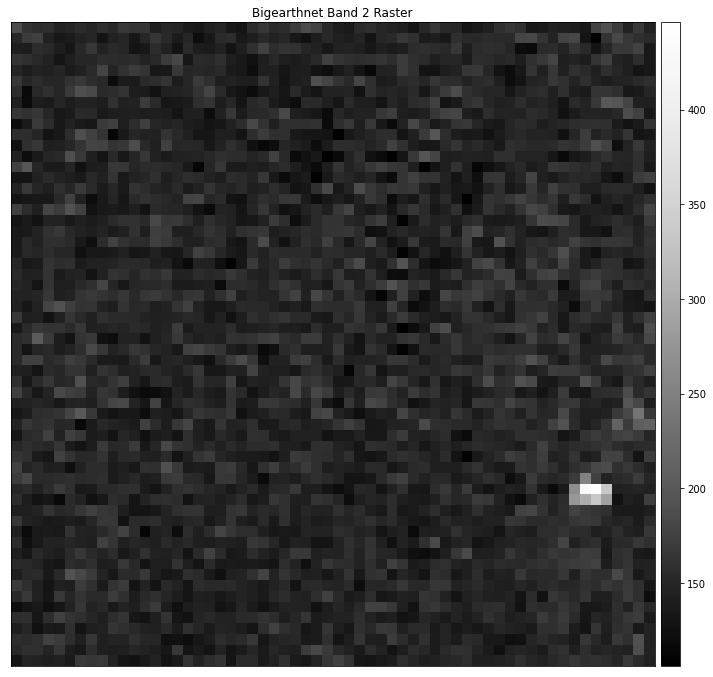

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(20.0, -20.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 60, 60)
min value: 106
max value: 446


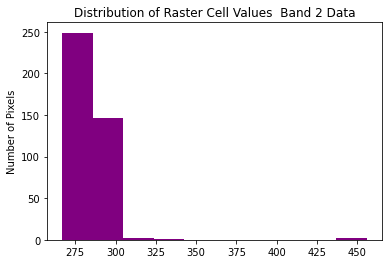

In [320]:
band2= rxr.open_rasterio(files[11])
ep.plot_bands(band12,
              title="Bigearthnet Band 2 Raster")
plt.show()
print("The CRS of this data is:", band2.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band2.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band12.rio.resolution())
print("The nodatavalue of your data is:", band2.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band2.rio.count)
print("The shape of your data is:", band12.shape)
print('min value:', np.nanmin(band2))
print('max value:', np.nanmax(band2))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 2 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [321]:
#https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html
#rasterio.plot.reshape_as_image(arr)
#Returns the source array reshaped into the order expected by image processing and visualization software (matplotlib, scikit-image, etc) by swapping the axes order from (bands, rows, columns) to (rows, columns, bands)


In [322]:
print('min value:', np.nanmin(data))
print('max value:', np.nanmax(data))

min value: 267
max value: 456


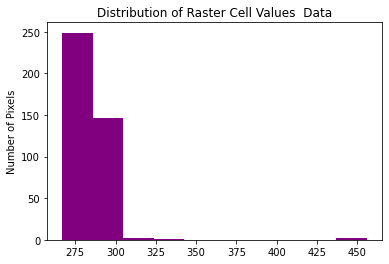

In [323]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [324]:
bins=[0, 100, 200, 250, 275, 300,350]

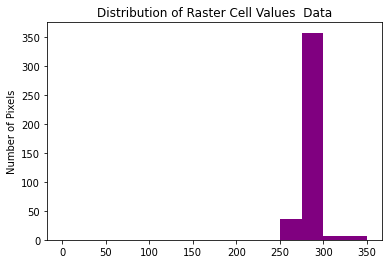

In [325]:
f, ax = plt.subplots()
data.plot.hist(color="purple",bins=[0, 100, 200, 250, 275, 300,350])
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [326]:
class_bins = [-np.inf,250,275,300,350,+np.inf]


In [327]:
import xarray as xr
data_class = xr.apply_ufunc(np.digitize,
                                     data,
                                     class_bins)
print(data_class.shape)
#data_class = np.array(data_class[0])

(1, 20, 20)


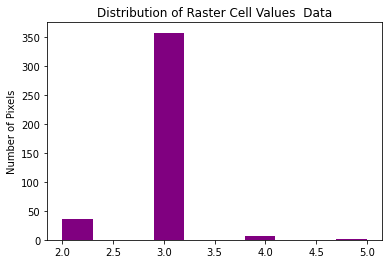

In [328]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data_class.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [329]:
#https://www.spatialreference.org/ref/epsg/32634/
#/*EPSG:32634

#WGS 84 / UTM zone 34N (Google it)

#WGS84 Bounds: 18.0000, 0.0000, 24.0000, 84.0000
#Projected Bounds: 166021.4431, 0.0000, 833978.5569, 9329005.1825
#Scope: Large and medium scale topographic mapping and engineering survey.
#Last Revised: June 2, 1995
#Area: World - N hemisphere - 18°E to 24°E - by country*/

#Proj4js.defs["EPSG:32634"] = "+proj=utm +zone=34 +ellps=WGS84 +datum=WGS84 +units=m +no_defs";

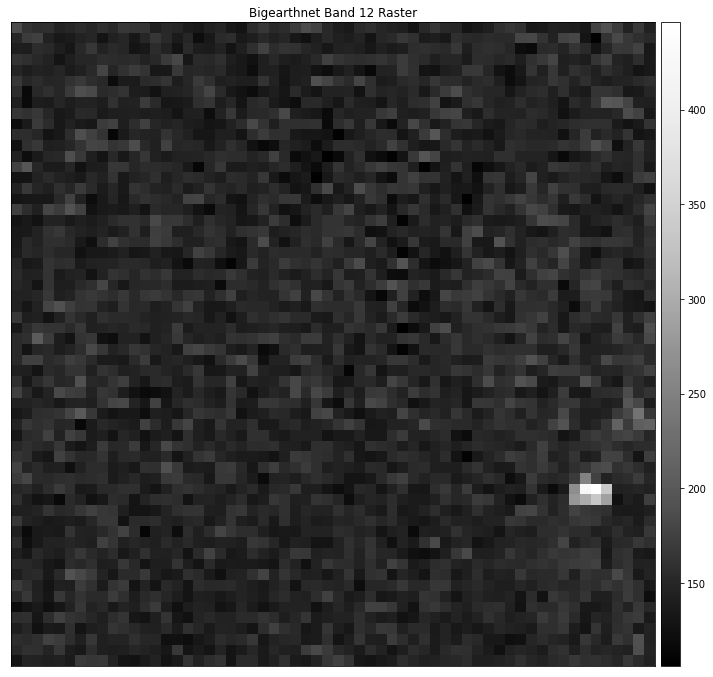

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(20.0, -20.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 60, 60)
min value: 106
max value: 446


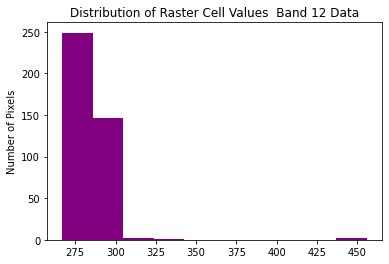

In [330]:
band12= rxr.open_rasterio(files[11])
ep.plot_bands(band12,
              title="Bigearthnet Band 12 Raster")
plt.show()
print("The CRS of this data is:", band12.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band12.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band12.rio.resolution())
print("The nodatavalue of your data is:", band12.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band12.rio.count)
print("The shape of your data is:", band12.shape)
print('min value:', np.nanmin(band12))
print('max value:', np.nanmax(band12))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 12 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

## New Section : Making Dataframe for min/max values of each bands of 1,2 and 12

In [402]:
import pandas as pd
df = pd.DataFrame(columns= ['filename','min','max'])
df.head()

,filename,min,max


In [403]:
import glob
import os
files=[]
min=[]
max=[]
mean_min =[]
mean_max =[]
path = '/content/drive/MyDrive/Big'
os.chdir(path)
dirs = os.listdir()
dirs.sort()
print(dirs)
print(len(dirs))
#remove last element of list
del dirs[0]
print(dirs)
print(len(dirs))
step_size = len(dirs)

['.ipynb_checkpoints', 'S2A_MSIL2A_20170613T101031_0_55', 'S2A_MSIL2A_20170613T101031_0_59', 'S2A_MSIL2A_20170613T101031_0_63', 'S2A_MSIL2A_20170613T101031_0_70', 'S2A_MSIL2A_20170613T101031_0_79', 'S2A_MSIL2A_20170613T101031_0_88']
7
['S2A_MSIL2A_20170613T101031_0_55', 'S2A_MSIL2A_20170613T101031_0_59', 'S2A_MSIL2A_20170613T101031_0_63', 'S2A_MSIL2A_20170613T101031_0_70', 'S2A_MSIL2A_20170613T101031_0_79', 'S2A_MSIL2A_20170613T101031_0_88']
6


In [404]:
# Add list of band1 tif files to files list
path = '/content/drive/MyDrive/Big'
files=[]
for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*01.tif'
  #print(s)
  temp = (glob.glob(os.path.join(s)))
  files.append(temp[0])


In [405]:
# Fetch Filenames of band 1

print(files[0],len(files))

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif 6


In [406]:
# Add min/max values of band 1 to min/max list

for i in range(0,step_size):
  band1= rxr.open_rasterio(files[i])
  min.append(np.nanmin(band1))
  max.append(np.nanmax(band1))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))
#df['B1_min'] = min
#df['B1_max'] = max
#print(df)

[267, 272, 294, 280, 245, 276]
[456, 308, 655, 327, 302, 328]


In [407]:
# Add list of band2 tif files to files list
path = '/content/drive/MyDrive/Big'

for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*02.tif'
  print(s)
  temp = (glob.glob(os.path.join(s)))
  files.append(temp[0])
print(files[len(files)-1], len(files))


/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_0_88_B02.tif 12


In [408]:
# Add min/max values of band 2 to min/max list

for i in range(step_size,2*step_size):
  band2= rxr.open_rasterio(files[i])
  min.append(np.nanmin(band2))
  max.append(np.nanmax(band2))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))

[267, 272, 294, 280, 245, 276, 123, 156, 198, 164, 139, 202]
[456, 308, 655, 327, 302, 328, 1215, 367, 985, 567, 515, 456]


In [409]:
# Add list of band 12 tif files to files list
path = '/content/drive/MyDrive/Big'

for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*12.tif'
  print(s)
  temp = (glob.glob(os.path.join(s)))
  files.append(temp[0])
print(files[len(files)-1], len(files))


/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_0_88_B12.tif 18


In [410]:
# Add min/max values of band 12 to min/max list

for i in range(2*step_size,3*step_size):
  band2= rxr.open_rasterio(files[i])
  min.append(np.nanmin(band2))
  max.append(np.nanmax(band2))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))


[267, 272, 294, 280, 245, 276, 123, 156, 198, 164, 139, 202, 92, 91, 95, 104, 119, 115]
[456, 308, 655, 327, 302, 328, 1215, 367, 985, 567, 515, 456, 149, 144, 1606, 153, 191, 170]


# Add files and min/max lists to dataframe

In [412]:
df['filename'] = files
df['min'] = min
df['max'] = max
df.head()

,filename,min,max
0,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,267,456
1,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,272,308
2,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,294,655
3,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,280,327
4,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,245,302


In [415]:
#print means of min and max values for each band 1 2 and 12
print(mean_min)
print(mean_max)

[272.3333333333333, 218.0, 179.55555555555554]
[396.0, 540.0833333333334, 494.1111111111111]


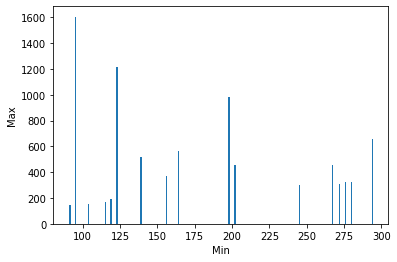

In [414]:
# Plot histogram 
import matplotlib.pyplot as plt
x=np.array(min)
y=np.array(max)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Min')
plt.ylabel('Max')
plt.show()

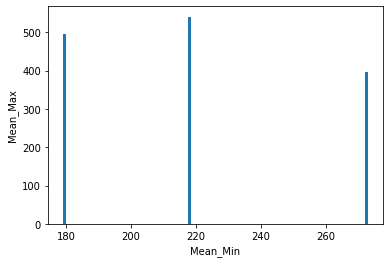

In [416]:
# Plot histogram for mean min and mean max
import matplotlib.pyplot as plt
x=np.array(mean_min)
y=np.array(mean_max)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Mean_Min')
plt.ylabel('Mean_Max')
plt.show()